Training with SGD Optimizer:
Epoch [1/5], Train Loss: 1.5417, Test Loss: 1.2671, Accuracy: 55.04%
Epoch [2/5], Train Loss: 1.0839, Test Loss: 0.9849, Accuracy: 65.49%
Epoch [3/5], Train Loss: 0.8859, Test Loss: 0.9359, Accuracy: 67.23%
Epoch [4/5], Train Loss: 0.7483, Test Loss: 0.8493, Accuracy: 70.64%
Epoch [5/5], Train Loss: 0.6346, Test Loss: 0.8217, Accuracy: 72.27%

Training with Adam Optimizer:
Epoch [1/5], Train Loss: 1.3562, Test Loss: 1.0923, Accuracy: 61.19%
Epoch [2/5], Train Loss: 0.9725, Test Loss: 0.9163, Accuracy: 67.21%
Epoch [3/5], Train Loss: 0.8060, Test Loss: 0.8410, Accuracy: 70.66%
Epoch [4/5], Train Loss: 0.6971, Test Loss: 0.8454, Accuracy: 70.37%
Epoch [5/5], Train Loss: 0.5988, Test Loss: 0.8148, Accuracy: 72.34%


Text(0.5, 1.0, 'Accuracy Comparison')

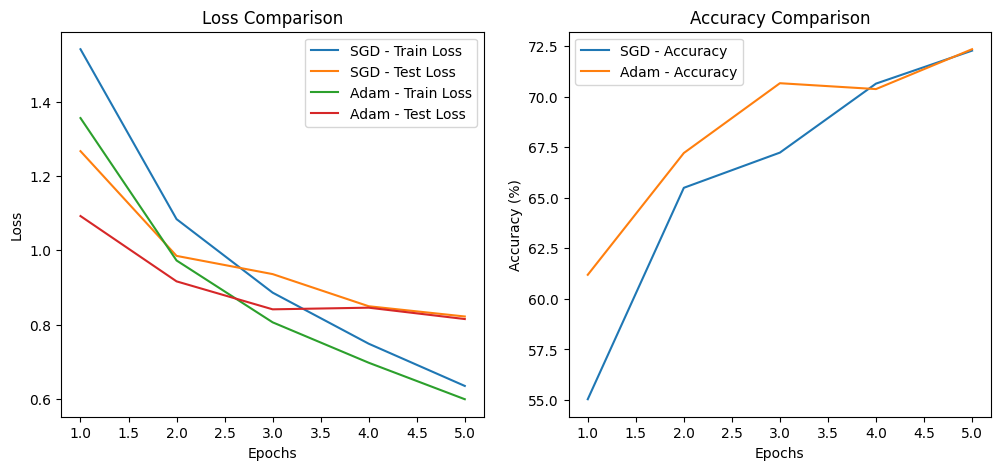

In [1]:
# Program 5 :  Implement a Simple CNN to compare performance of any two optimizers on a same dataset.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function
def train_and_evaluate(model, optimizer, criterion, epochs=5):
    train_losses, test_losses, test_accuracies = [], [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluate Model
        model.eval()
        test_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, test_accuracies

# Initialize Models
model_sgd = SimpleCNN()
model_adam = SimpleCNN()

# Define Loss Function
criterion = nn.CrossEntropyLoss()

# Define Optimizers
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

# Train & Evaluate Models
print("Training with SGD Optimizer:")
train_sgd, test_sgd, acc_sgd = train_and_evaluate(model_sgd, optimizer_sgd, criterion)

print("\nTraining with Adam Optimizer:")
train_adam, test_adam, acc_adam = train_and_evaluate(model_adam, optimizer_adam, criterion)

# Plot Performance Comparison
epochs = range(1, 6)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_sgd, label='SGD - Train Loss')
plt.plot(epochs, test_sgd, label='SGD - Test Loss')
plt.plot(epochs, train_adam, label='Adam - Train Loss')
plt.plot(epochs, test_adam, label='Adam - Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_sgd, label='SGD - Accuracy')
plt.plot(epochs, acc_adam, label='Adam - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Comparison')